In [1]:
from iarotraffic import tms
import iarotraffic
from pystoned.constant import CET_ADDI, FUN_PROD, RTS_VRS
from pystoned import wCQER

tmsf = tms.TrafficMeasurmentStationFinland(109, 2018, 255, 2)

In [2]:
tmsf.load_raw_data()

Download successful - file for the sensor 109 for the day 255 in year 2018 was loaded in                  0.4756 seconds 


In [3]:
tmsf.aggregate()
tmsf.aggregated_data

Aggregating data for modeling took 0.0593 seconds


,id,date,aggregation,direction,smspeed,minuteflow,minutecars,minutebuses,minutetrucks,flow,cars,buses,trucks,density,seconds,time
0,109,2018-09-12,360,2,101.933726,27,25,0,2,1620.0,1500.0,0.0,120.0,15.892679,21600.0,06:00
1,109,2018-09-12,361,2,99.899610,31,29,1,1,1860.0,1740.0,60.0,60.0,18.618691,21660.0,06:01
2,109,2018-09-12,362,2,98.310585,26,23,1,2,1560.0,1380.0,60.0,120.0,15.868078,21720.0,06:02
3,109,2018-09-12,363,2,98.043940,36,35,0,1,2160.0,2100.0,0.0,60.0,22.030938,21780.0,06:03
4,109,2018-09-12,364,2,90.924870,43,36,1,6,2580.0,2160.0,60.0,360.0,28.375075,21840.0,06:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,109,2018-09-12,1195,2,101.311387,21,21,0,0,1260.0,1260.0,0.0,0.0,12.436904,71700.0,19:55
836,109,2018-09-12,1196,2,95.986980,19,16,1,2,1140.0,960.0,60.0,120.0,11.876611,71760.0,19:56
837,109,2018-09-12,1197,2,101.781886,12,12,0,0,720.0,720.0,0.0,0.0,7.073950,71820.0,19:57
838,109,2018-09-12,1198,2,99.654000,17,16,0,1,1020.0,960.0,0.0,60.0,10.235415,71880.0,19:58


<Figure size 432x288 with 0 Axes>

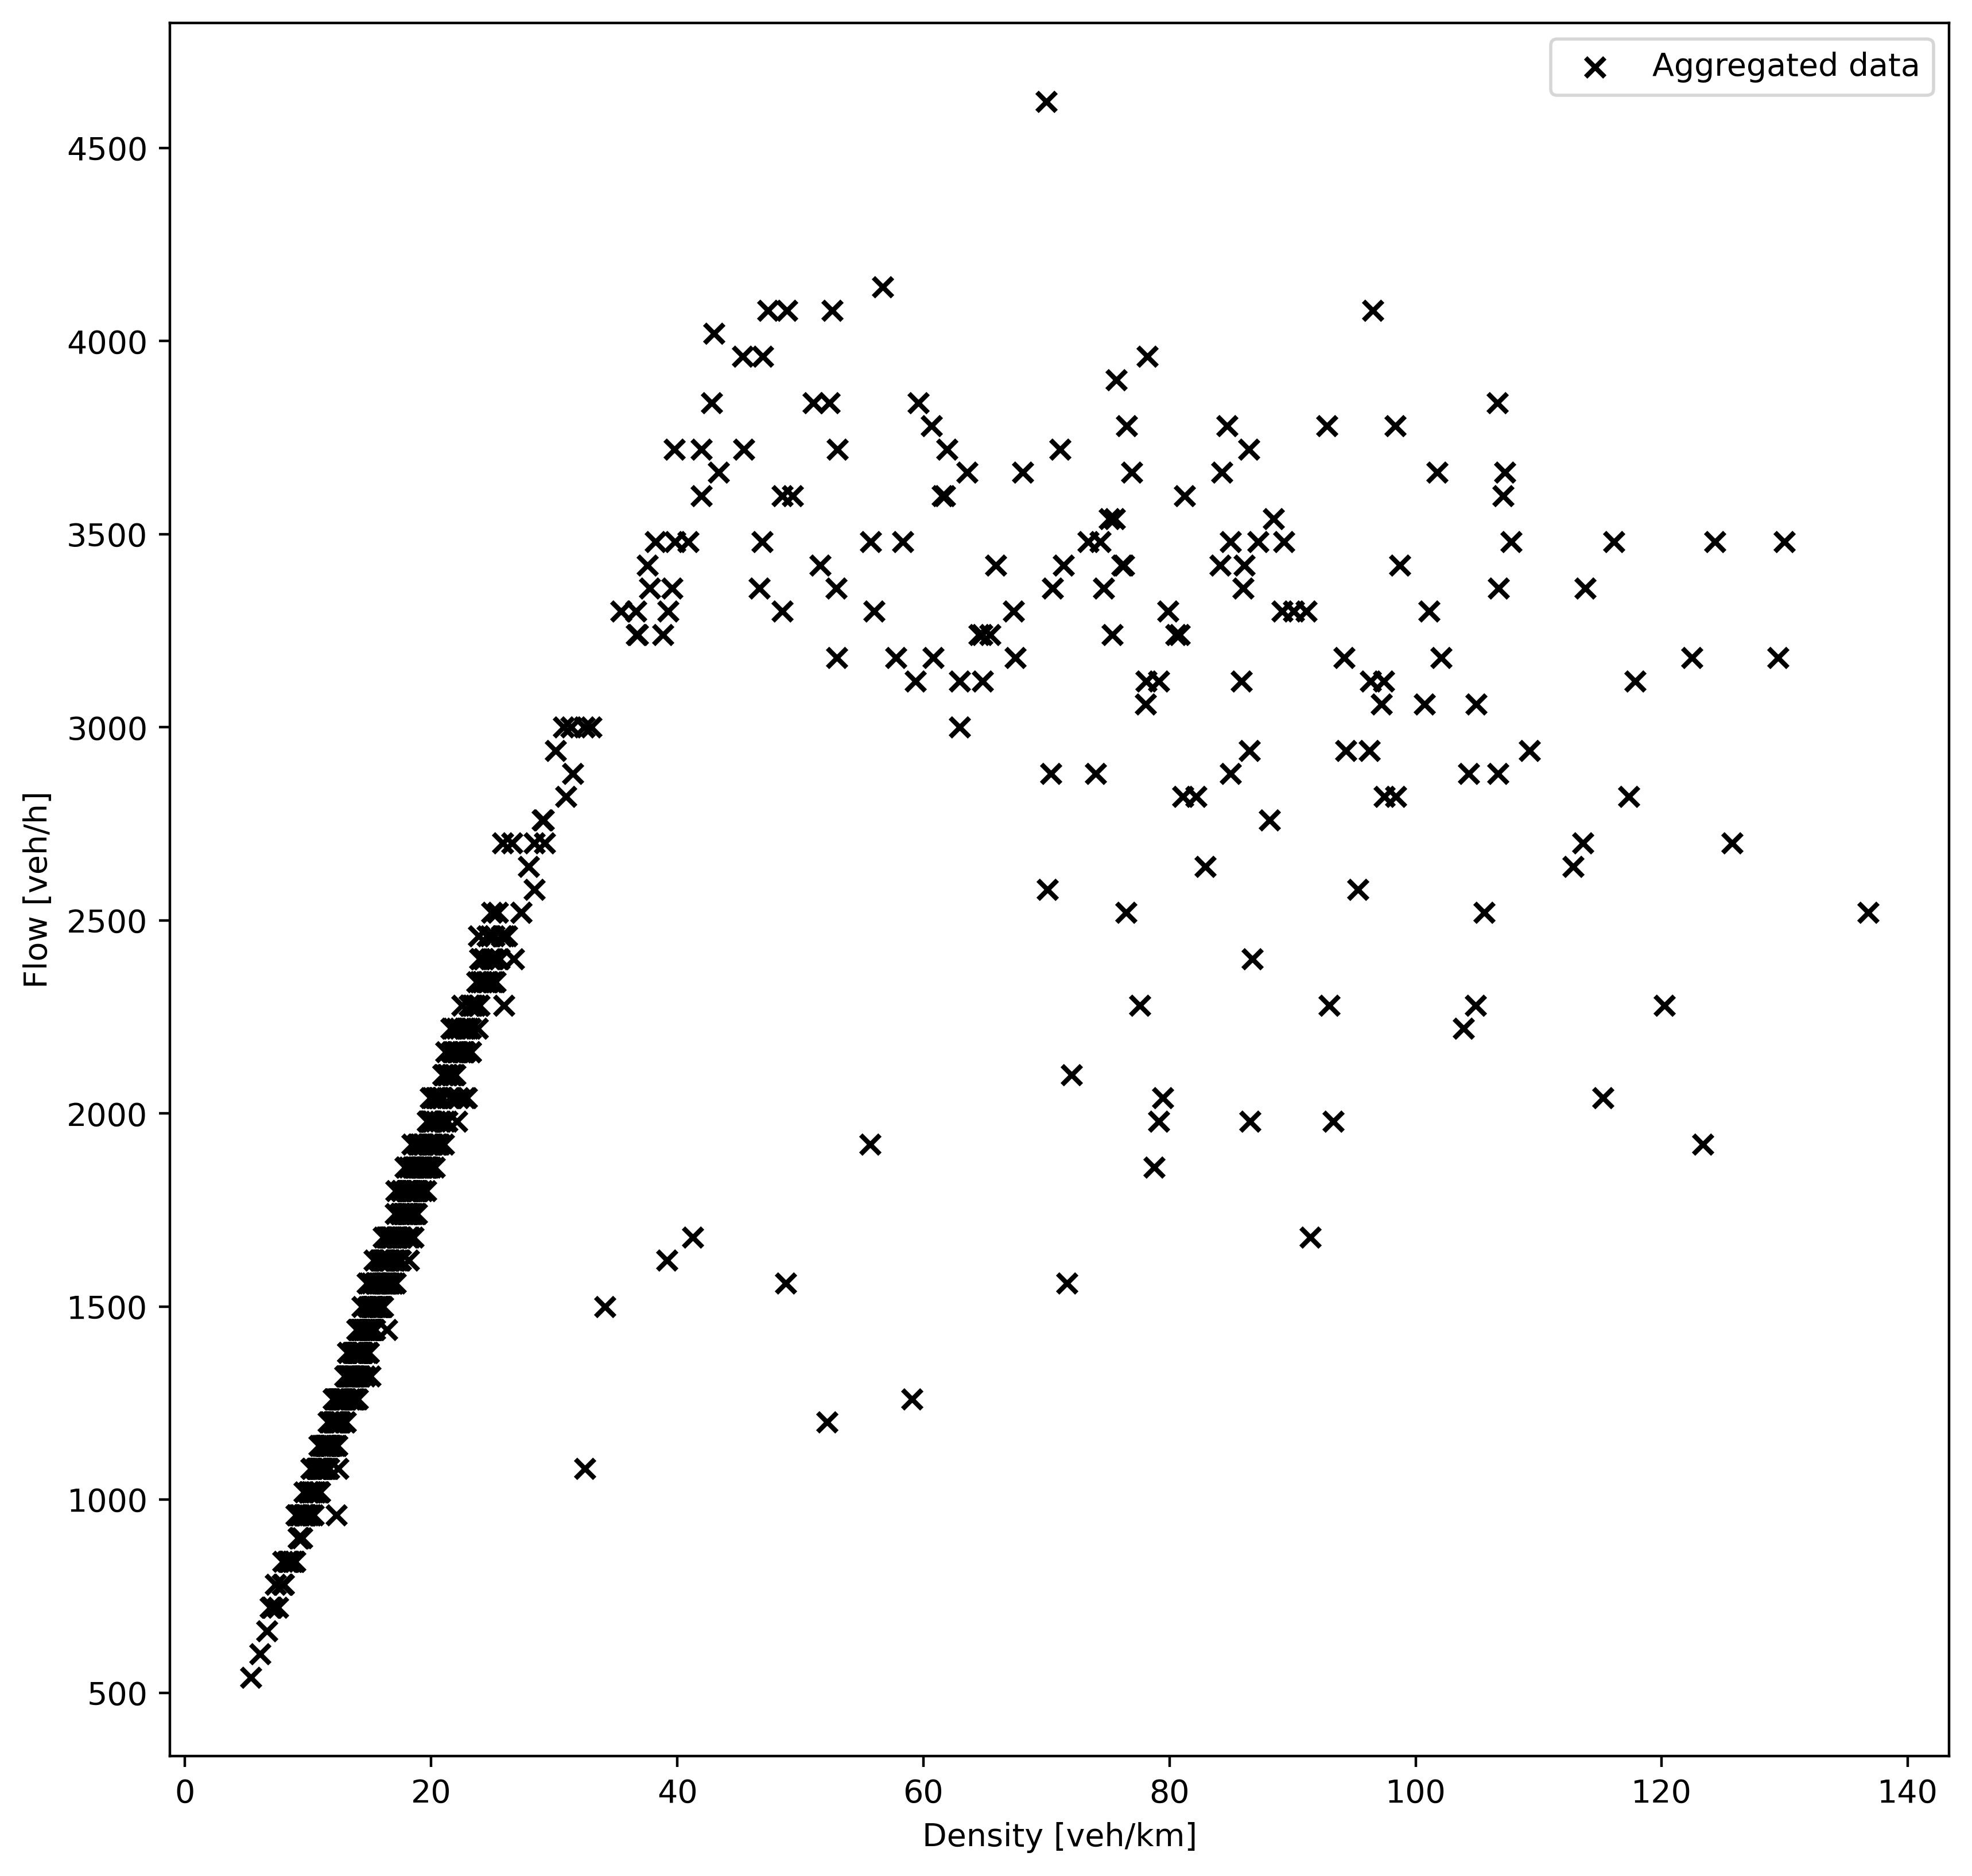

In [4]:
tmsf.plot_aggregated()

In [5]:
tmsf.bag()
tmsf.weighted_model()

AttributeError: 'DataFrame' object has no attribute 'hourlyflow'

In [9]:
tmsf.bagged_model[0].display_beta()

beta : beta
    Size=64, Index=beta_index
    Key     : Lower : Value               : Upper : Fixed : Stale : Domain
     (0, 0) :  None :   93.11362010995194 :  None : False :  True :  Reals
     (1, 0) :  None :   93.11362010995217 :  None : False :  True :  Reals
     (2, 0) :  None :    93.1136201099521 :  None : False :  True :  Reals
     (3, 0) :  None :    93.1136201099521 :  None : False :  True :  Reals
     (4, 0) :  None :   93.11362010995211 :  None : False :  True :  Reals
     (5, 0) :  None :   93.11362010995211 :  None : False :  True :  Reals
     (6, 0) :  None :   93.11362010995212 :  None : False :  True :  Reals
     (7, 0) :  None :    93.1136201099521 :  None : False :  True :  Reals
     (8, 0) :  None :    93.1136201099521 :  None : False :  True :  Reals
     (9, 0) :  None :   93.11362010995212 :  None : False :  True :  Reals
    (10, 0) :  None :   93.11362010995212 :  None : False :  True :  Reals
    (11, 0) :  None :    93.1136201099521 :  None : False 

In [16]:
tmsf.y_bagged

0       60.0
1      120.0
2      180.0
3      180.0
4      240.0
       ...  
59     660.0
60     720.0
61    1440.0
62    1680.0
63     540.0
Name: centroid_flow, Length: 64, dtype: float64

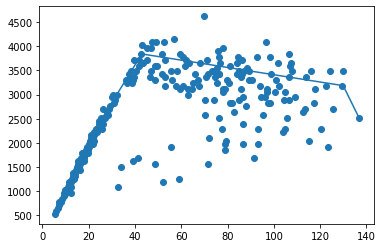

In [6]:
x=tmsf.bagged_data.centroid_density
y=tmsf.bagged_data.centroid_flow
yhat=tmsf.bagged_model[2].get_frontier()

import matplotlib.pyplot as plt
plt.clf()

plt.scatter(x,y)
plt.plot(x, yhat)

In [ ]:
DEF_FILEPATH = './toi'
df = iarotraffic.traffic.download_lam_day_report('109', '01', 2018, 255, 5, 23)
df_agg = iarotraffic.traffic.fscalc(df, 1)
dir1 = df_agg[df_agg.direction == 2]

Download successful - file for the sensor 109 for the day 255 in year 2018.                 Download took 0.5968 seconds
Aggregating data for modeling took 0.1034 seconds


In [ ]:
type(dir1.density)

pandas.core.series.Series

In [ ]:
tmsf.get_data(dir1.density, dir1.hourlyflow)

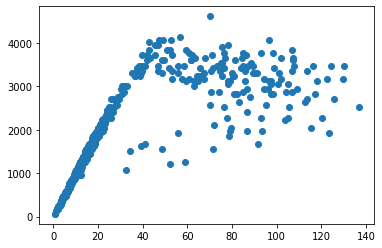

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.scatter(tmsf.density, tmsf.flow)